<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
df['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

<AxesSubplot:ylabel='Frequency'>

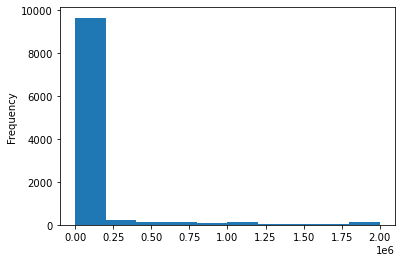

In [4]:
# your code goes here
df['ConvertedComp'].plot(kind='hist')

Plot the histogram for the column `ConvertedComp`.


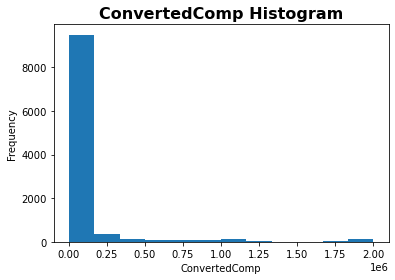

In [5]:
# your code goes here
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['ConvertedComp'], bins=12)
plt.pyplot.xlabel("ConvertedComp")
plt.pyplot.ylabel("Frequency")
plt.pyplot.title("ConvertedComp Histogram", fontsize=16, fontweight='bold')
plt.pyplot.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
len(df['Gender'].loc[df['Gender']=='Man'])

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
df_women_conv_comp = df[['Gender', 'ConvertedComp']].loc[df['Gender']=='Woman']
df_women_conv_comp['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


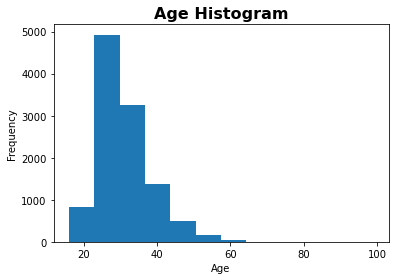

In [10]:
# your code goes here
plt.pyplot.hist(df['Age'], bins=12)
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("Frequency")
plt.pyplot.title("Age Histogram", fontsize=16, fontweight='bold')
plt.pyplot.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:ylabel='ConvertedComp'>

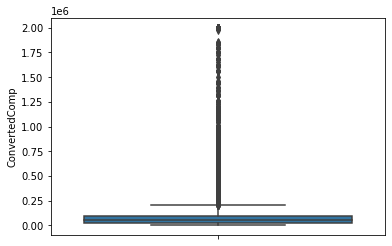

In [25]:
# your code goes here
import seaborn as sns
sns.boxplot(y='ConvertedComp', data=df)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# your code goes here
q1 = df['ConvertedComp'].quantile(q=0.25)
q3 = df['ConvertedComp'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

73132.0


Find out the upper and lower bounds.


In [44]:
# your code goes here
lower_bound = q1 - iqr*1.5
upper_bound= q3 + iqr*1.5
print("The lower bound is: " + str(lower_bound))
print("The upper bound is: " + str(upper_bound))

The lower bound is: -82830.0
The upper bound is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [48]:
# your code goes here
upper_outliers = df['ConvertedComp'][df['ConvertedComp'] > upper_bound]
lower_outliers = df['ConvertedComp'][df['ConvertedComp'] < lower_bound]
print(len(upper_outliers))
print(len(lower_outliers))
total_outliers = len(upper_outliers) + len(lower_outliers)
print("Number of outliers in ConvertedComp is: " + str(total_outliers))

879
0
Number of outliers in ConvertedComp is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [54]:
# your code goes here
new_df = df['ConvertedComp'][df['ConvertedComp'] <= upper_bound]
new_df

0         61000.0
1         95179.0
2         90000.0
4         65277.0
5         31140.0
           ...   
11392      9600.0
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
Name: ConvertedComp, Length: 9703, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [75]:
# your code goes here
df.corr()['Age'].sort_values(ascending=False)

Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64

In [73]:
new_df.mean()

59883.20838915799

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
